In [1]:
import pandas as pd
df = pd.read_csv("../input/attrition.csv")
df1=df

# Exploratory Data Analysis

Detecting Categorical Columns 

In [2]:
for i in df.columns:
    print(i+": "+str(len(df[i].value_counts())))

S.No: 327
EmpID: 325
Emp Name: 327
DOJ: 239
Designation: 10
Grade: 7
Attrition : 1
Location: 140
In Active Date: 183
Tenure: 73
Gender: 2
Education: 2
Age: 23
Last Rating: 5
Monthly Income: 317
Engagement Score (% Satisfaction): 98
Marital Status: 3
Zone: 9
Remarks: 10


From above screen, it is clear that we are having following columns as categorical

**Designation, 
 Grade,
 Location,
 Gender,
 Education,
 Last Rating,
 Martial Status,
 Zone,
 Remarks**

Removing duplicacy from columns 

**Designation **

In [3]:
df['Designation'] = df['Designation'].str.lower()
for i in range(df['Designation'].shape[0]):
    if "sr" not in df['Designation'][i]:
        if "sales executive" in df['Designation'][i]:
            df['Designation'][i]="sales executive"
    else:
        df['Designation'][i] = "sr sales executive"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
df['Grade'].value_counts()
#from the box below it is clear that there is no duplicacy 

E1     235
E2      34
M2      27
M1      22
M3       5
M4       3
CXO      1
Name: Grade, dtype: int64

In [5]:
df['Gender'].value_counts()
#from the box below it is clear that there is no duplicacy

Male      309
Female     18
Name: Gender, dtype: int64

In [6]:
df['Education'].value_counts()
#from the box below it is clear that there is no duplicacy

Bachelors    309
MBA           18
Name: Education, dtype: int64

In [7]:
df['Last Rating'].value_counts()
#from the box below it is clear that there is no duplicacy

4    116
2     85
3     84
5     32
1     10
Name: Last Rating, dtype: int64

In [8]:
df['Marital Status'].value_counts()
#from the box below it is clear that there is no duplicacy

Divorced    118
Single      106
Married     103
Name: Marital Status, dtype: int64

In [9]:
print("Before Handling")
print(df['Zone'].value_counts())
#This contains duplicacy, we have to handle it 
df['Zone']=df['Zone'].str.lower()
print('\n')
print("After Handling")
print(df['Zone'].value_counts())

Before Handling
South      98
North      70
East       58
West       51
CENTRAL    19
HO         17
Central    10
SOUTH       2
NORTH       2
Name: Zone, dtype: int64


After Handling
south      100
north       72
east        58
west        51
central     29
ho          17
Name: Zone, dtype: int64


In [10]:
df['Remarks'].value_counts()
#from the box below it is clear that there is no duplicacy

Issues with the Manager                           145
Lack of Growth                                     96
More Challenging Job Roles/ Higher designation     31
Better Salary                                      19
Termination - Poor Performance                     13
Absconding                                          8
Termination - Theft                                 6
Health Reasons                                      4
Higher education                                    3
Reasons not known                                   2
Name: Remarks, dtype: int64

Now, Duplicacy has been removed from the columns, thus we can do the analysis individually
1. First we will see individual columns' count plot (for catgorical columns) and draw insights from them and then we will se these columns individually by making hue of another columns.
2. Next, we will draw the insights from the continuous columns.

In [11]:
l = ['Designation', 'Grade', 'Gender', 'Education', 'Last Rating', 'Marital Status', 'Zone', 'Remarks']

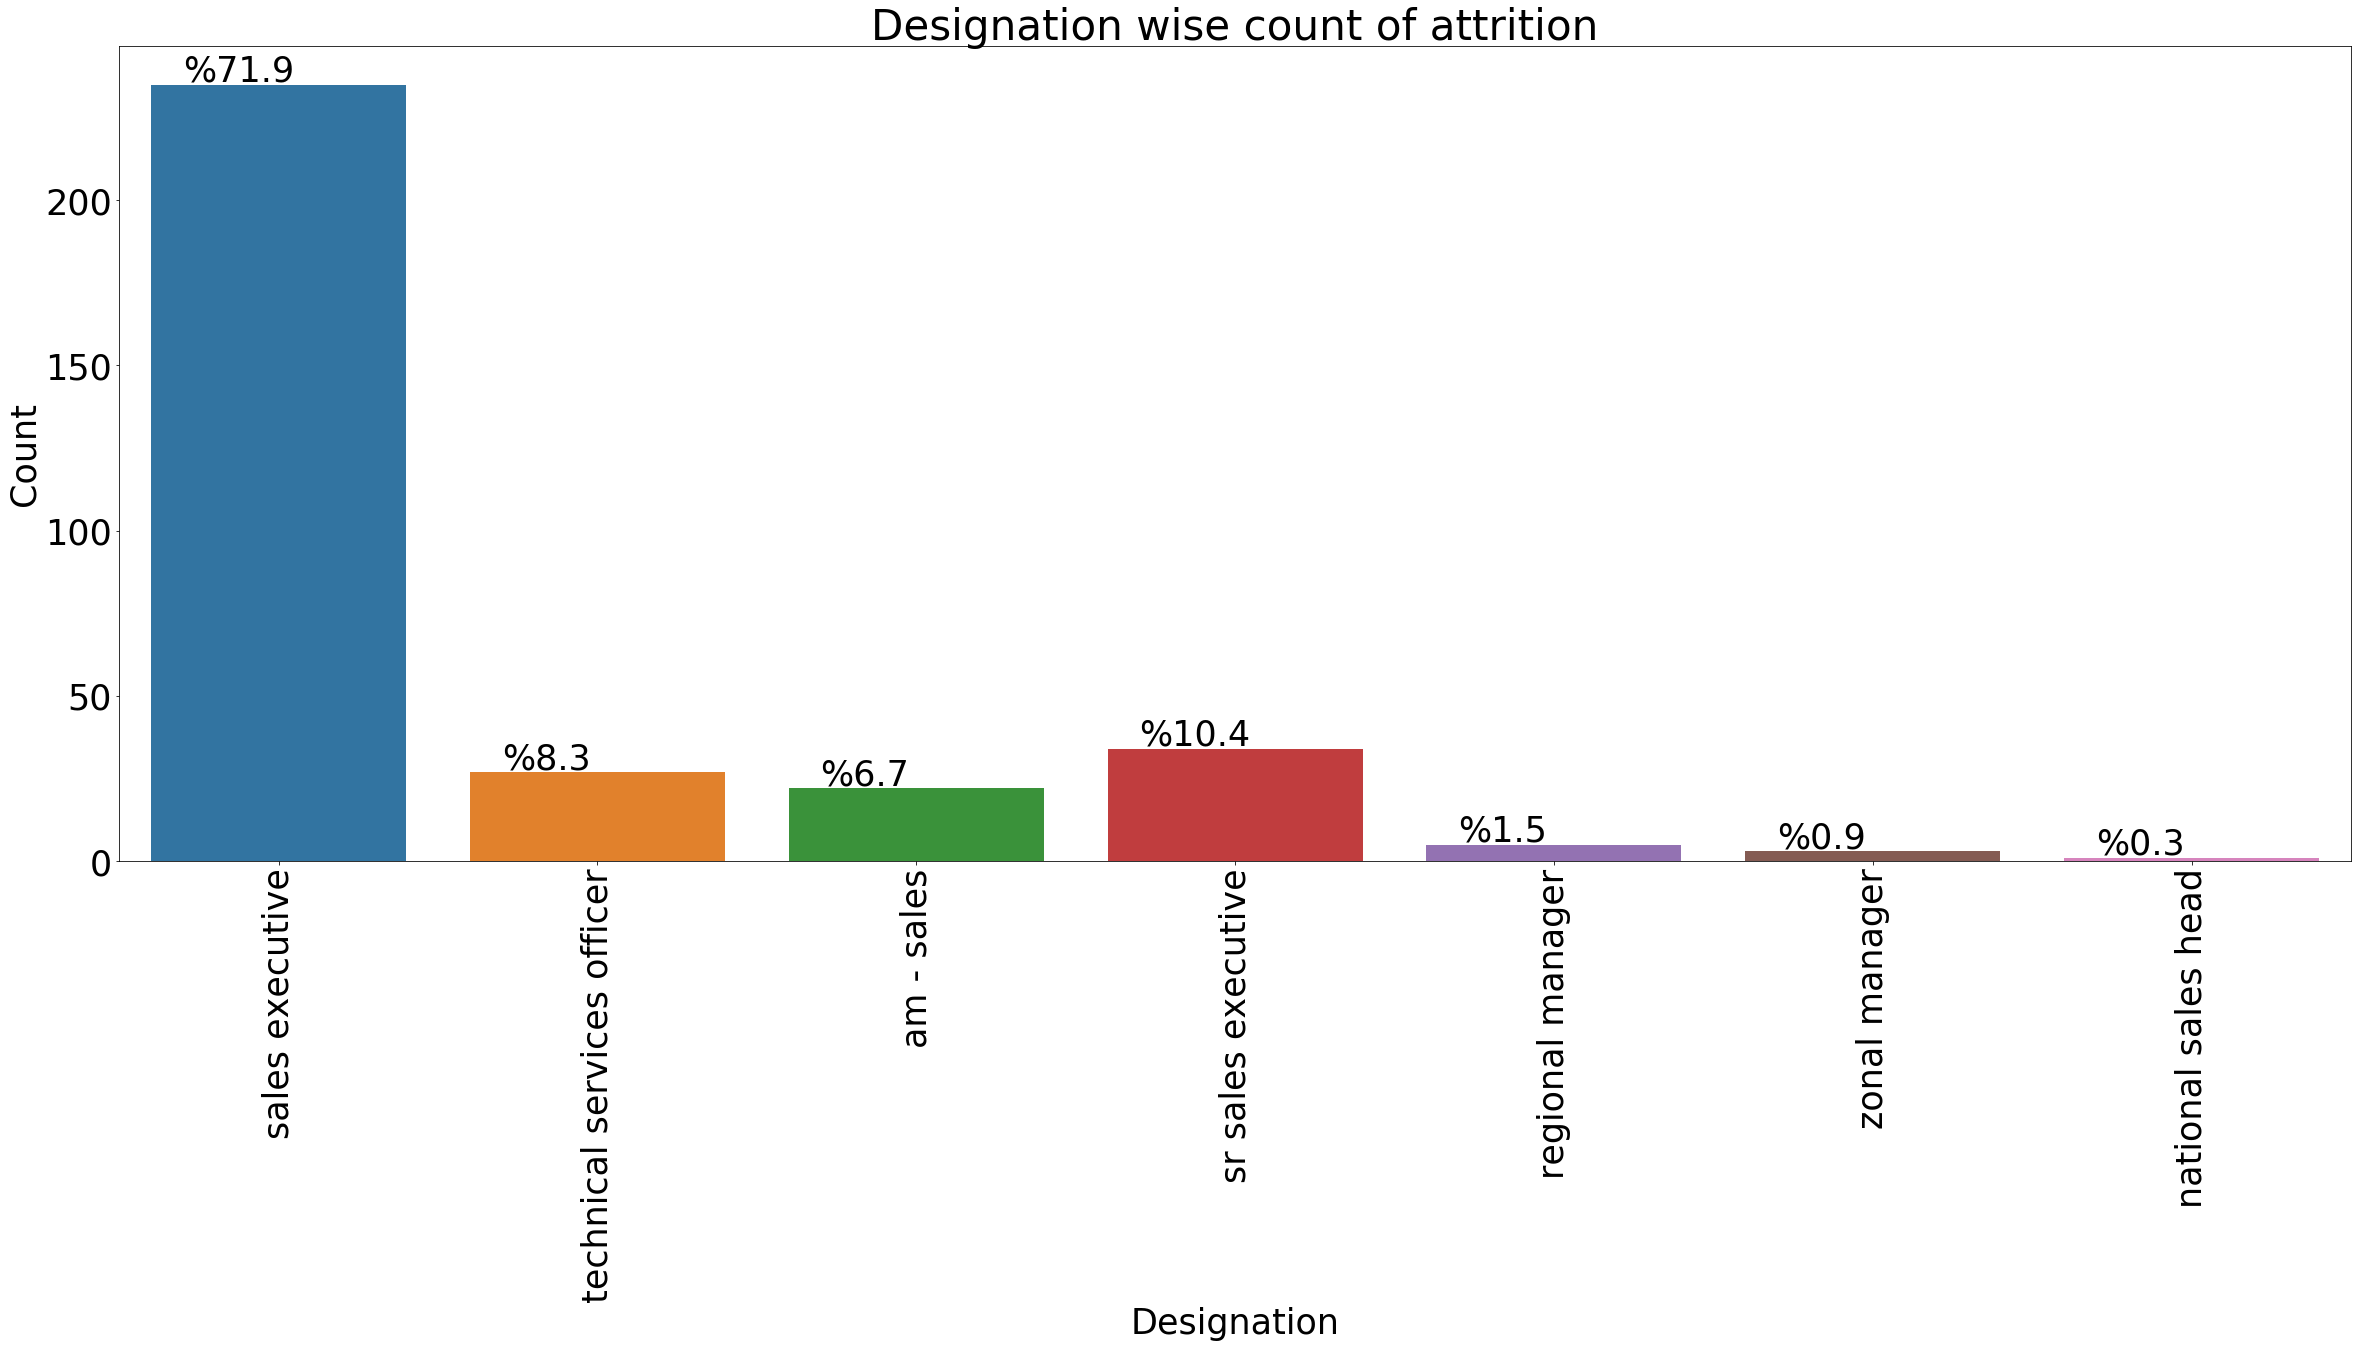

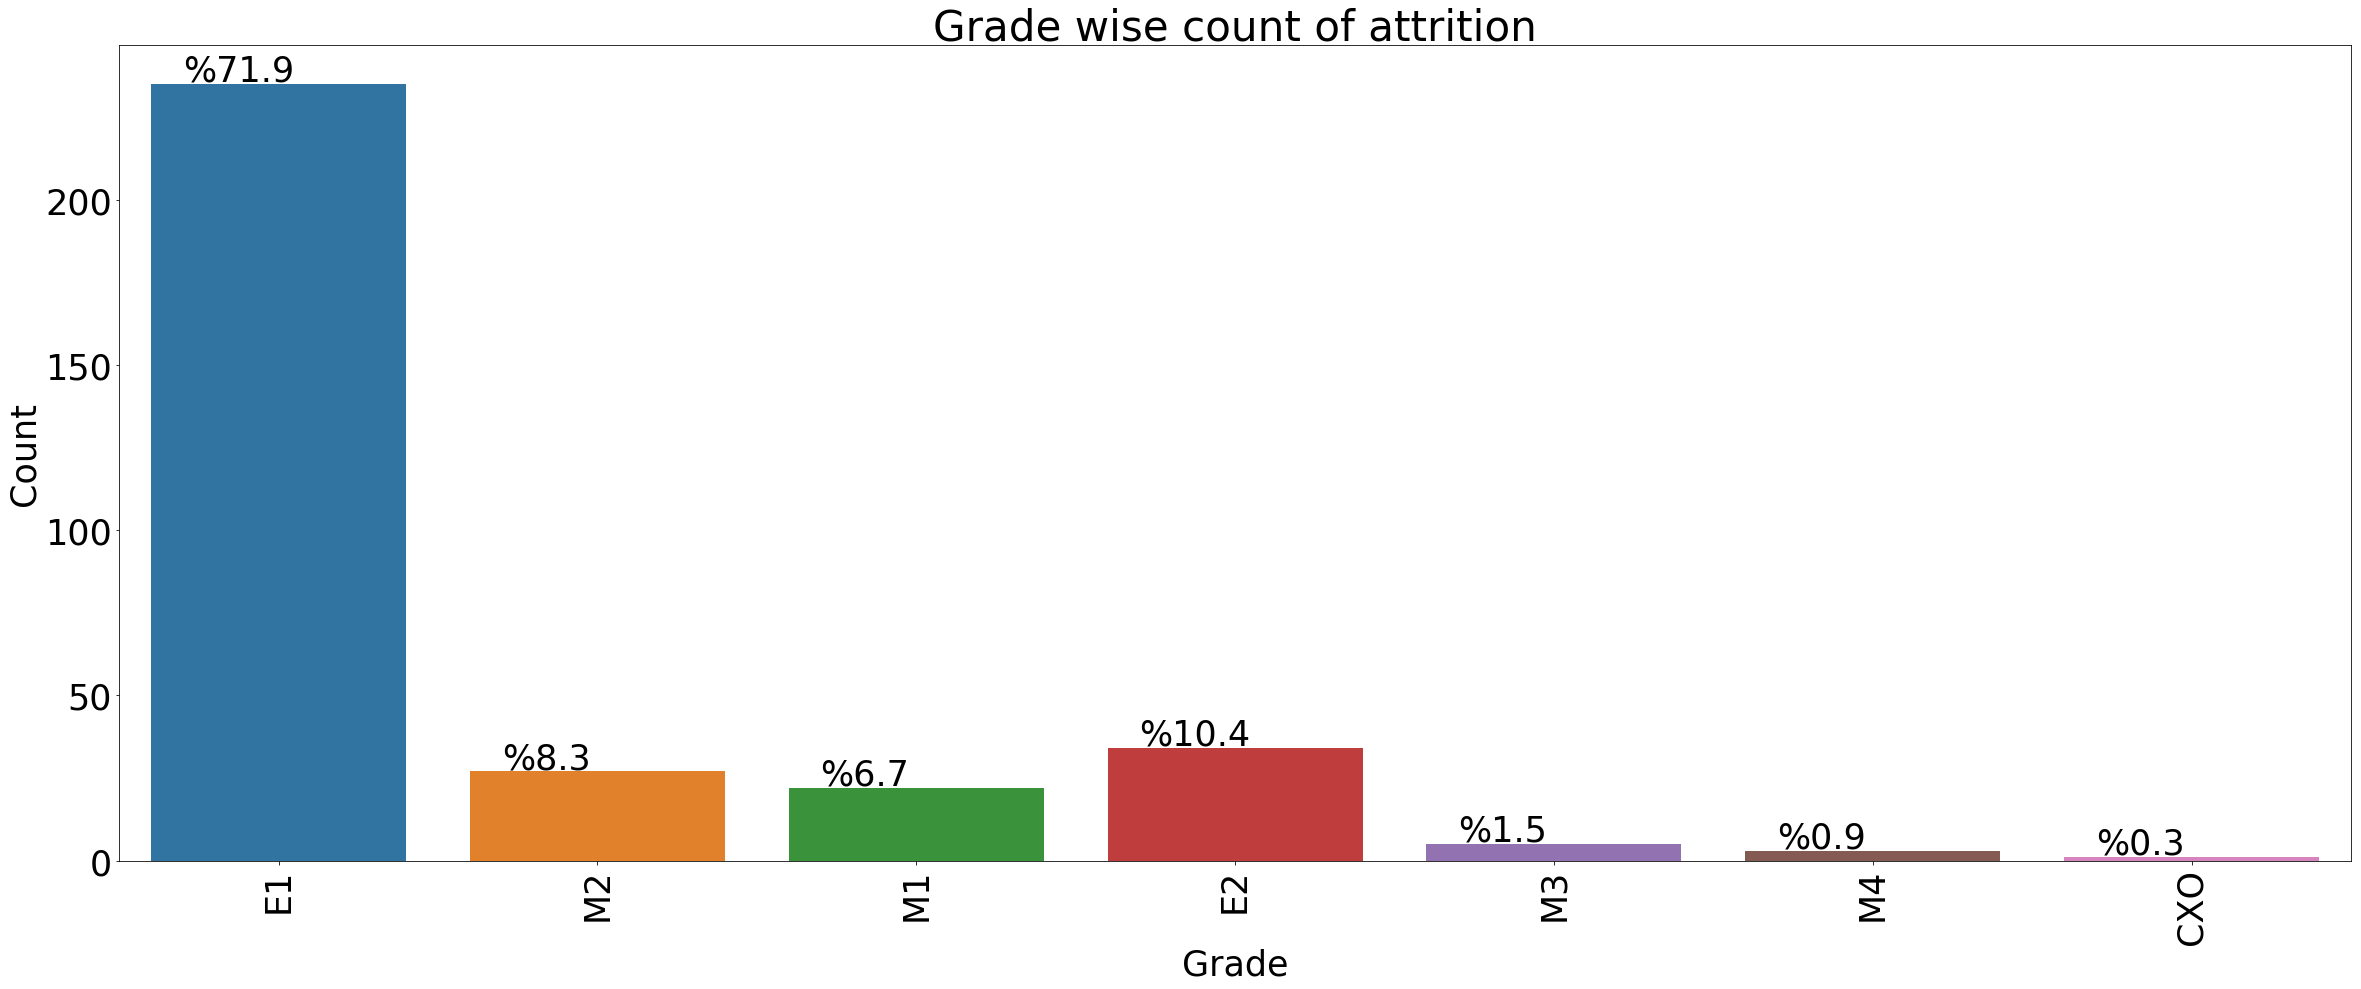

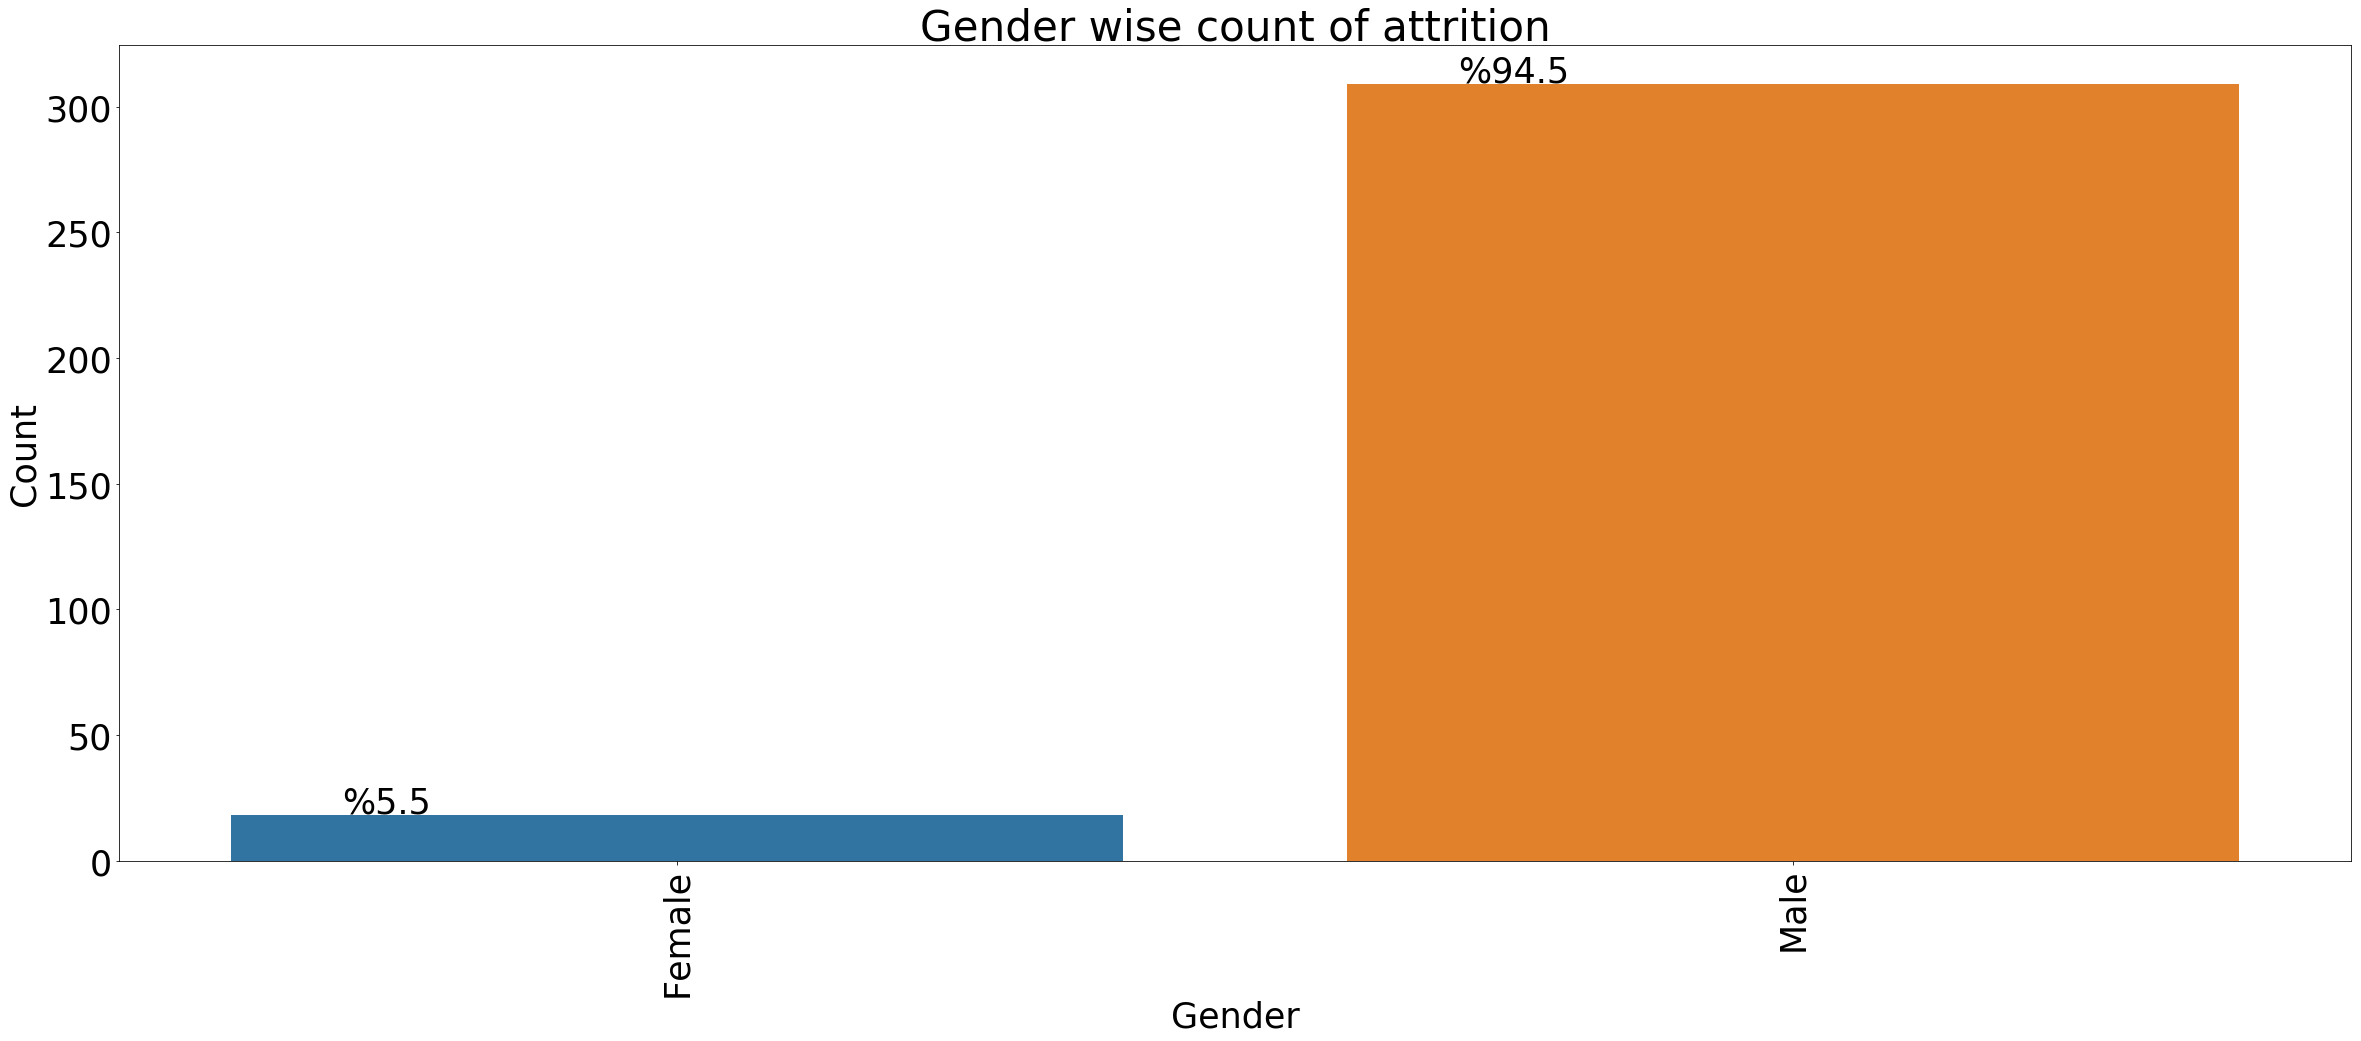

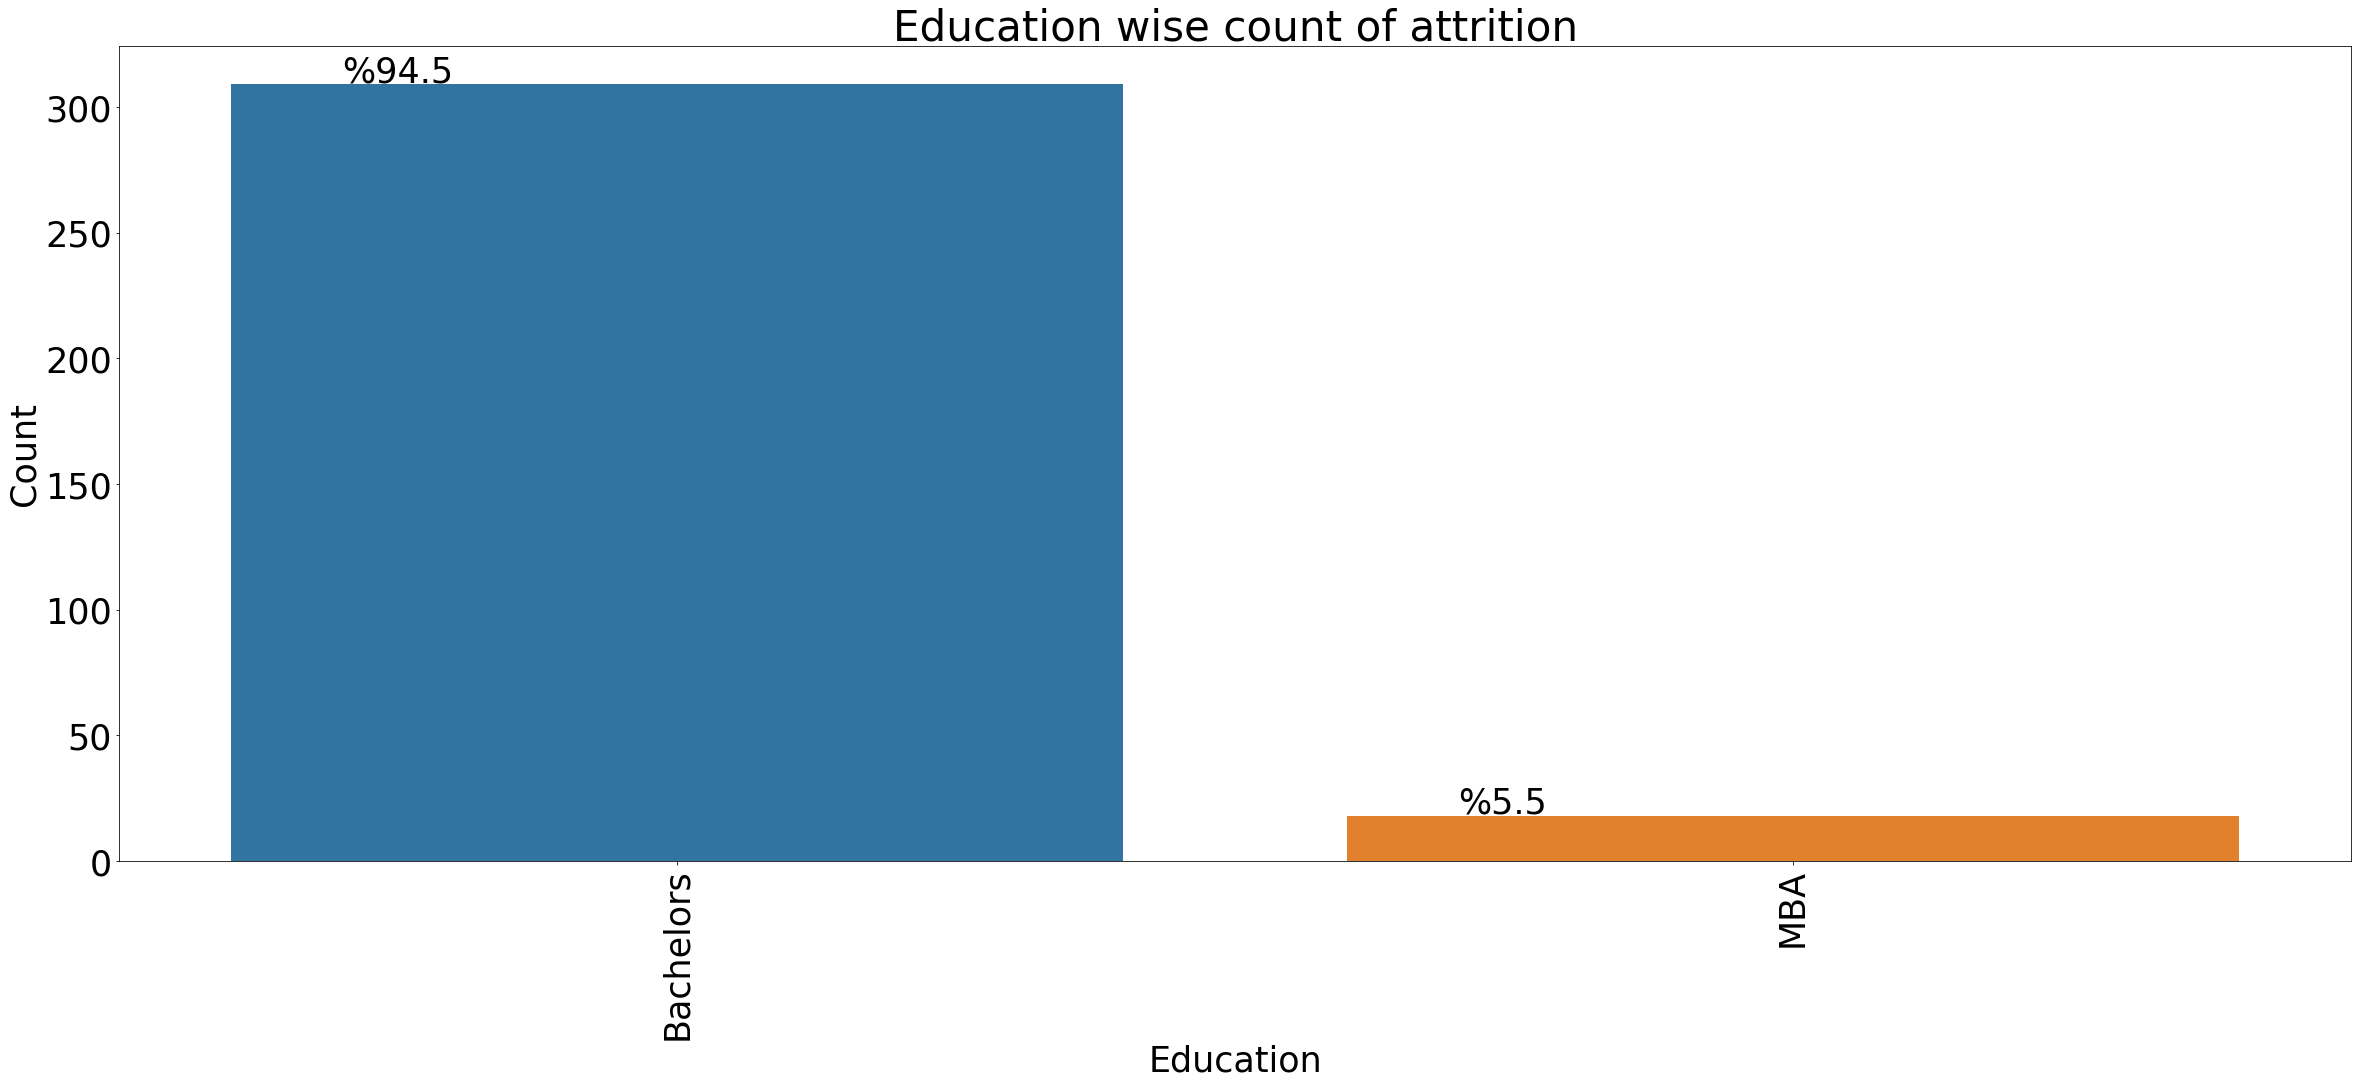

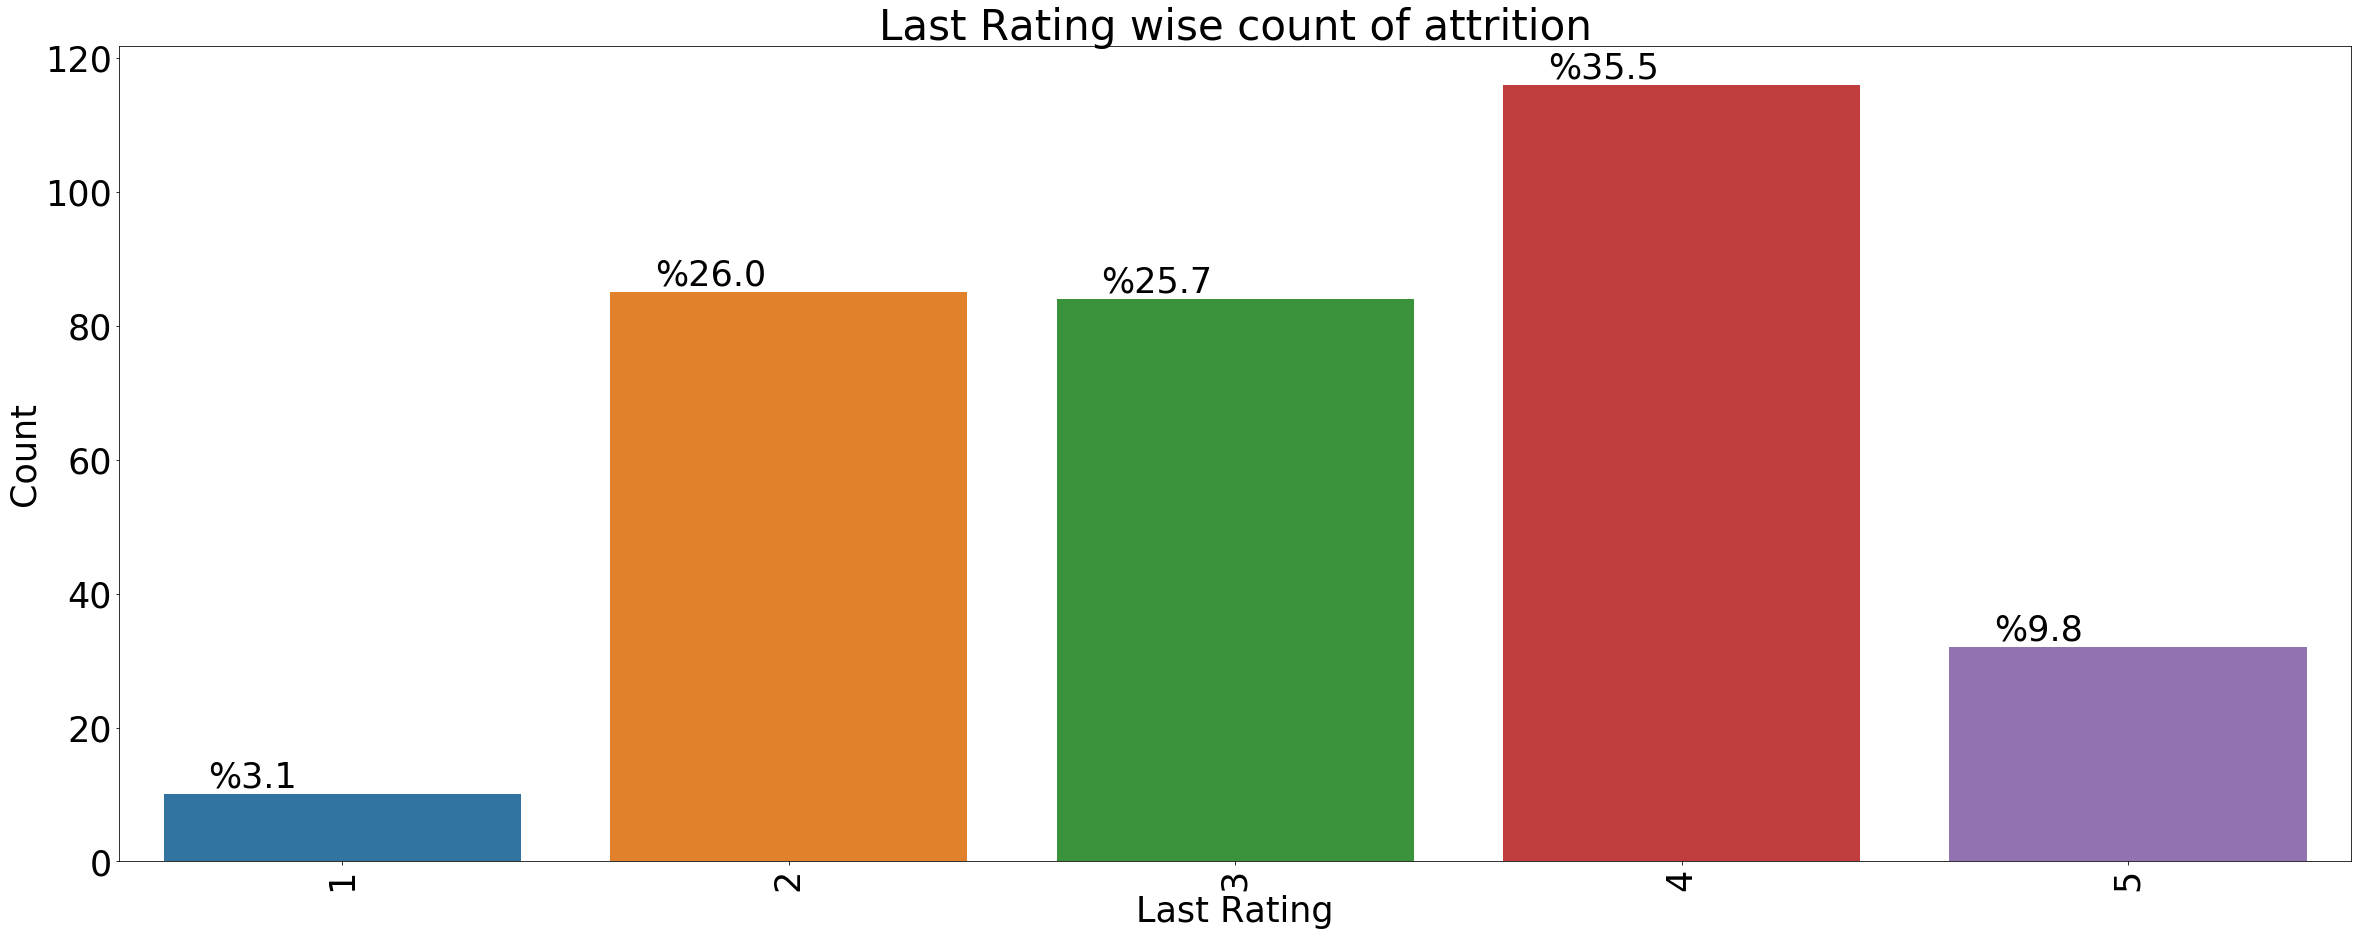

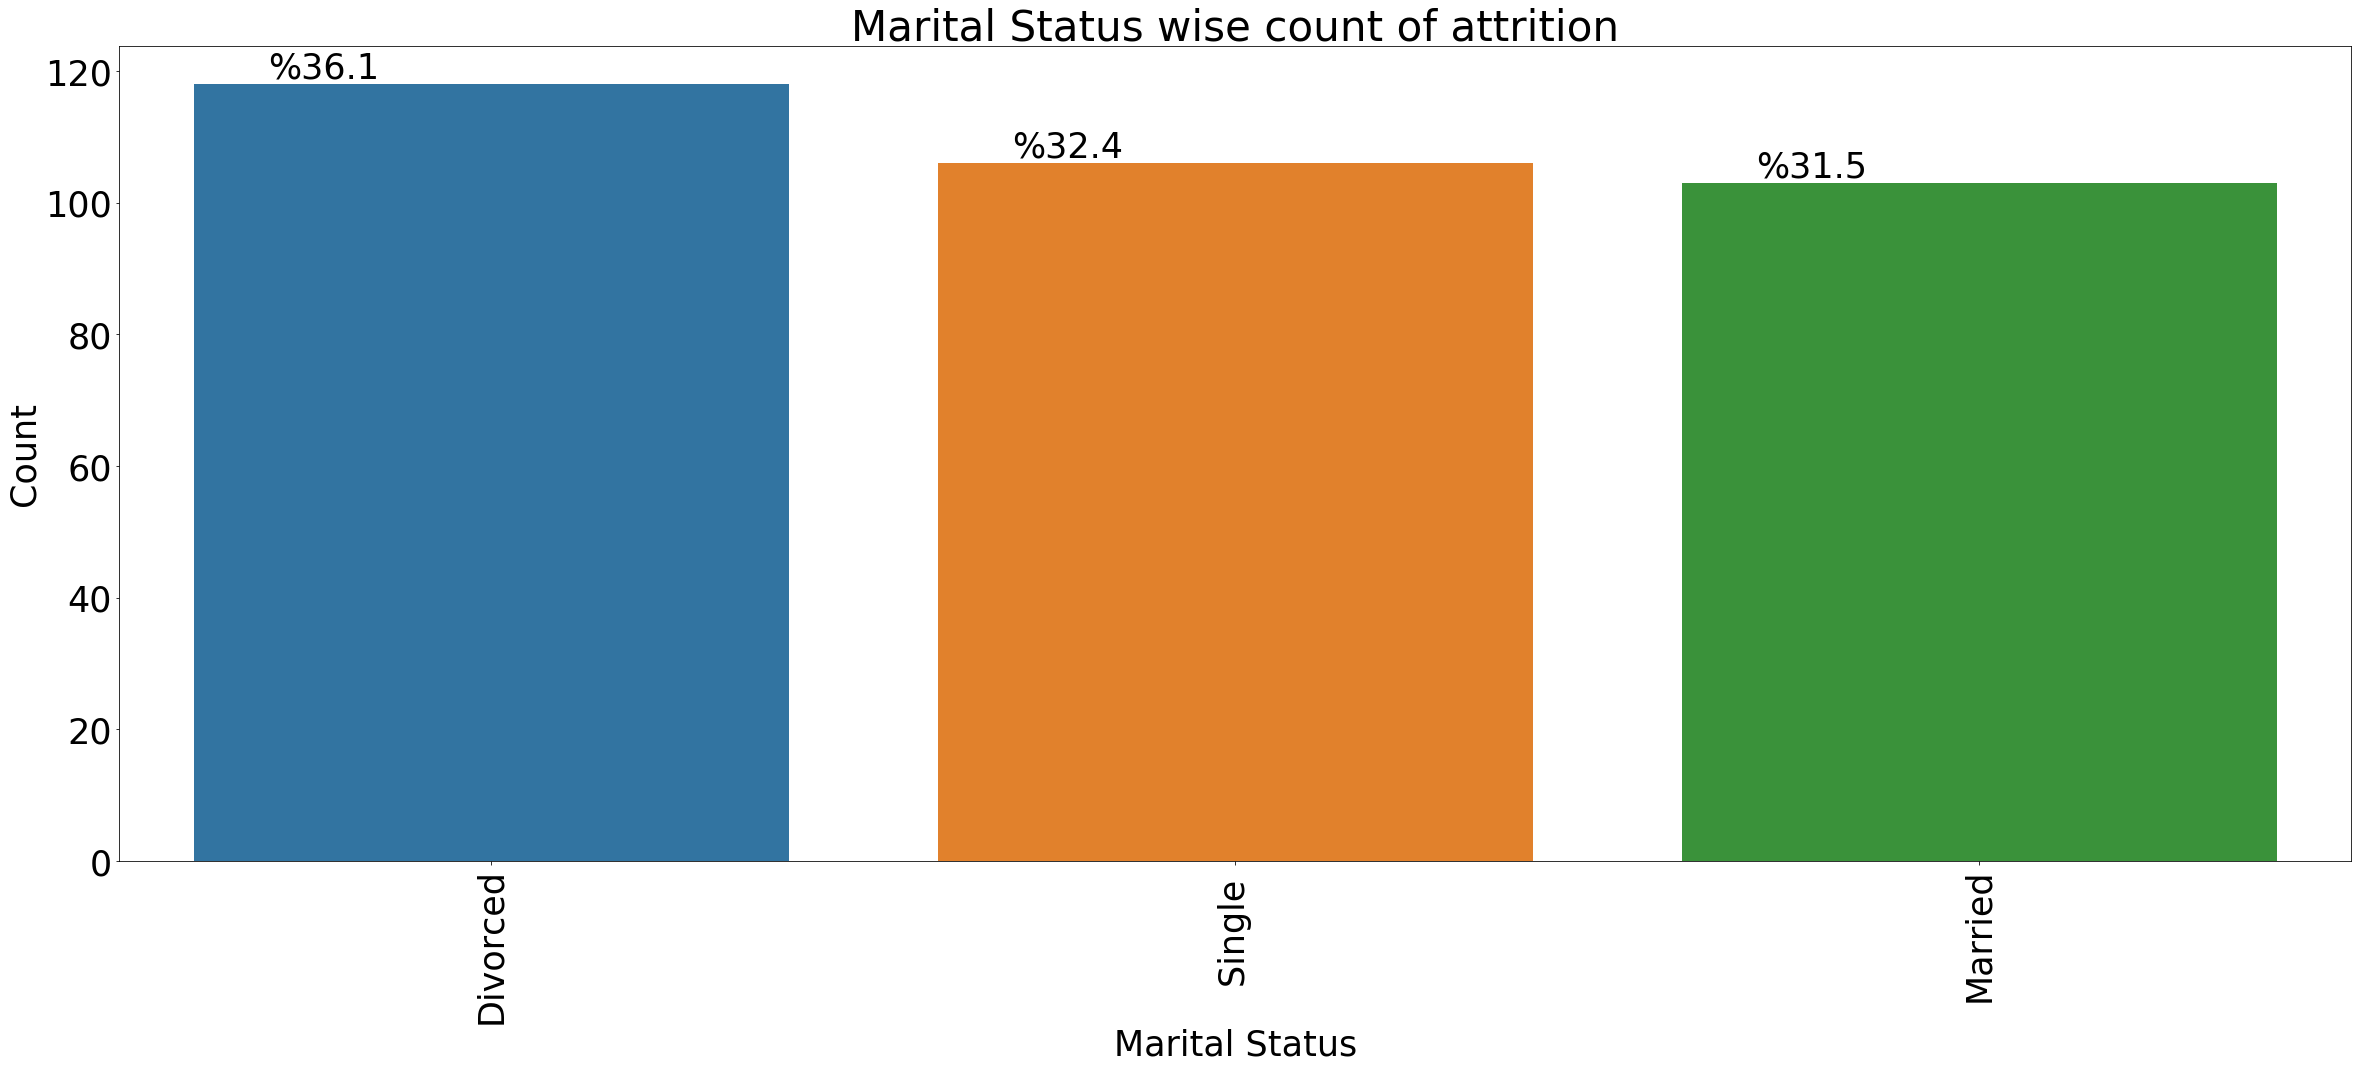

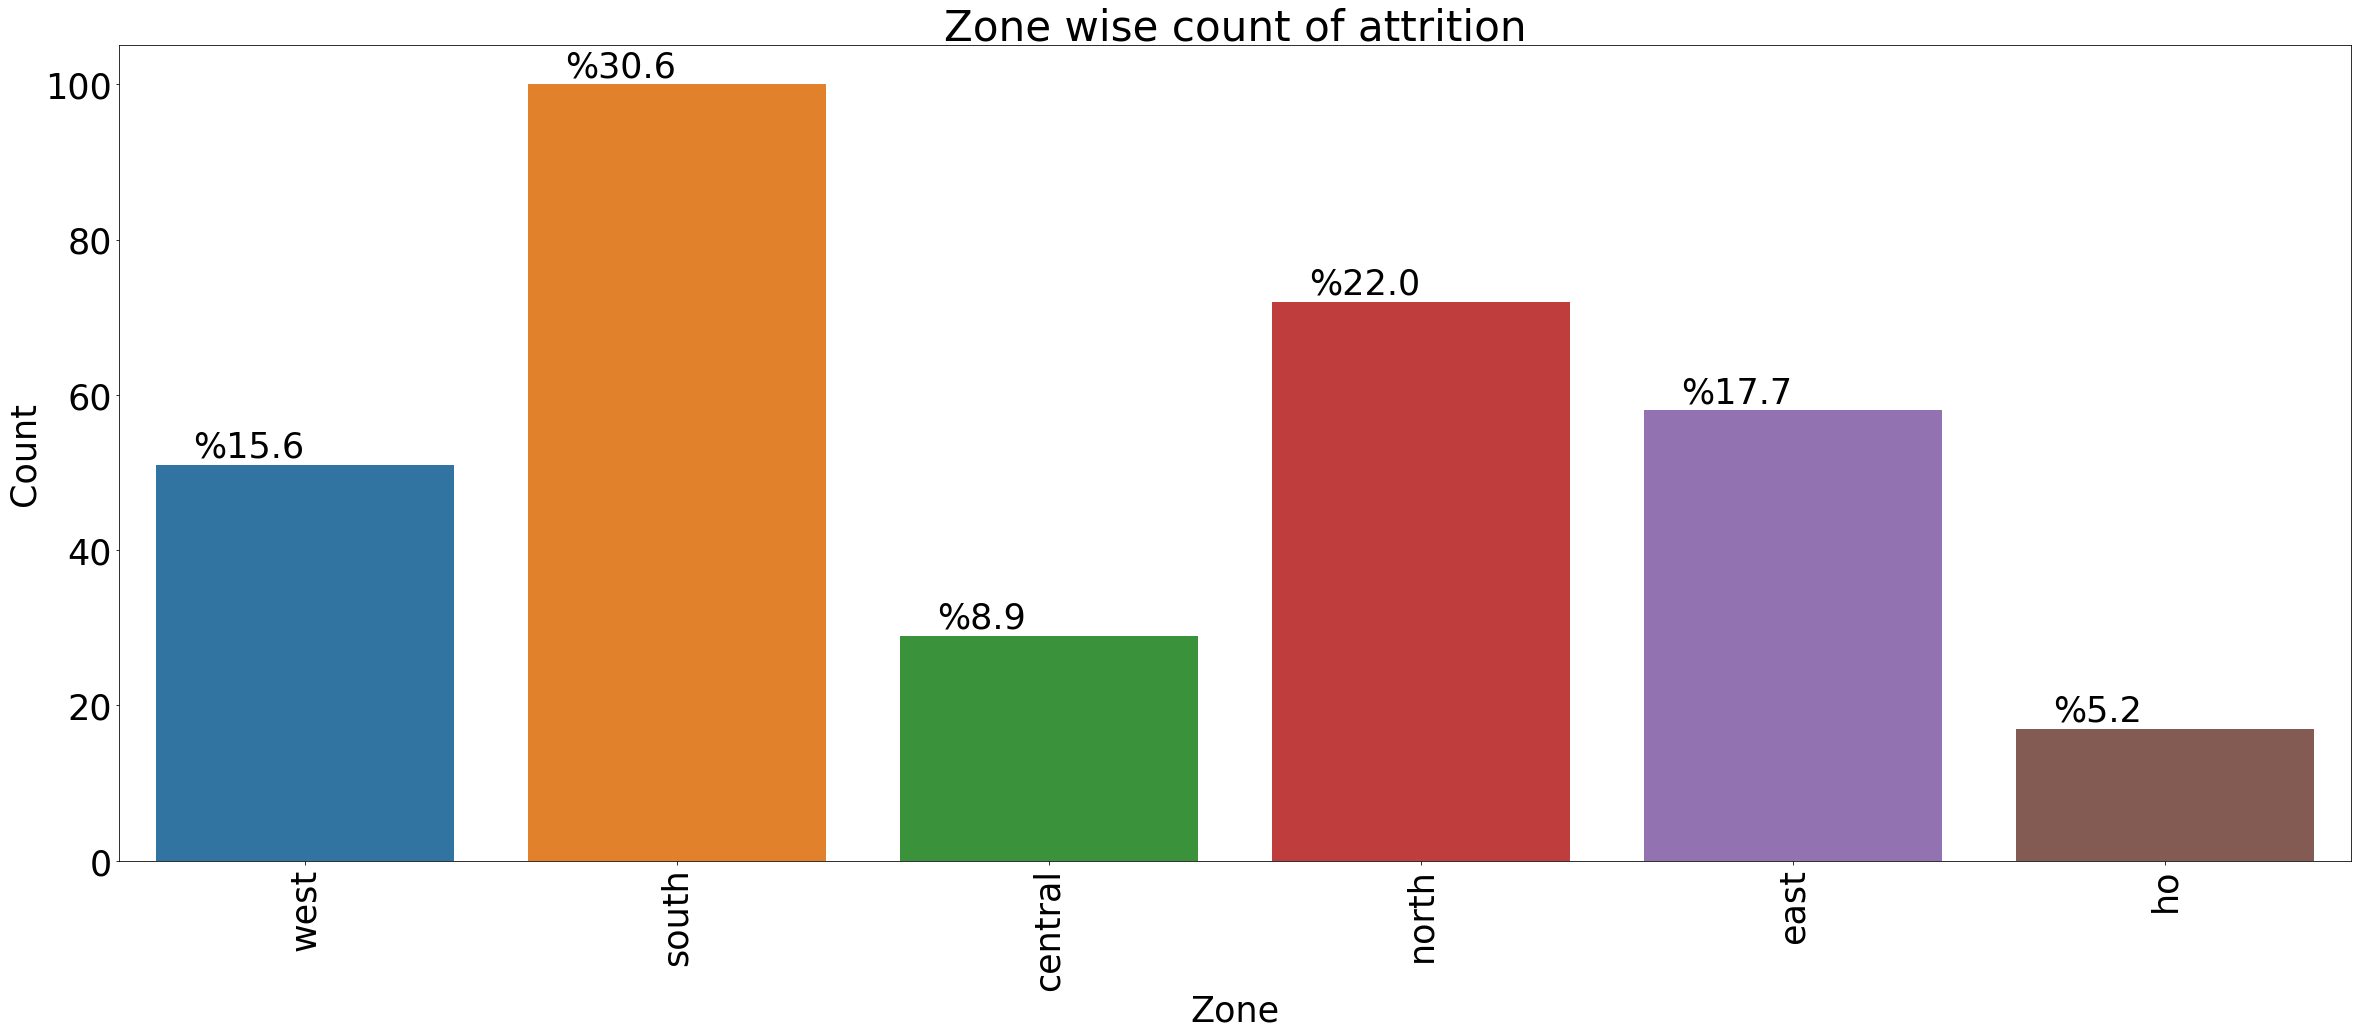

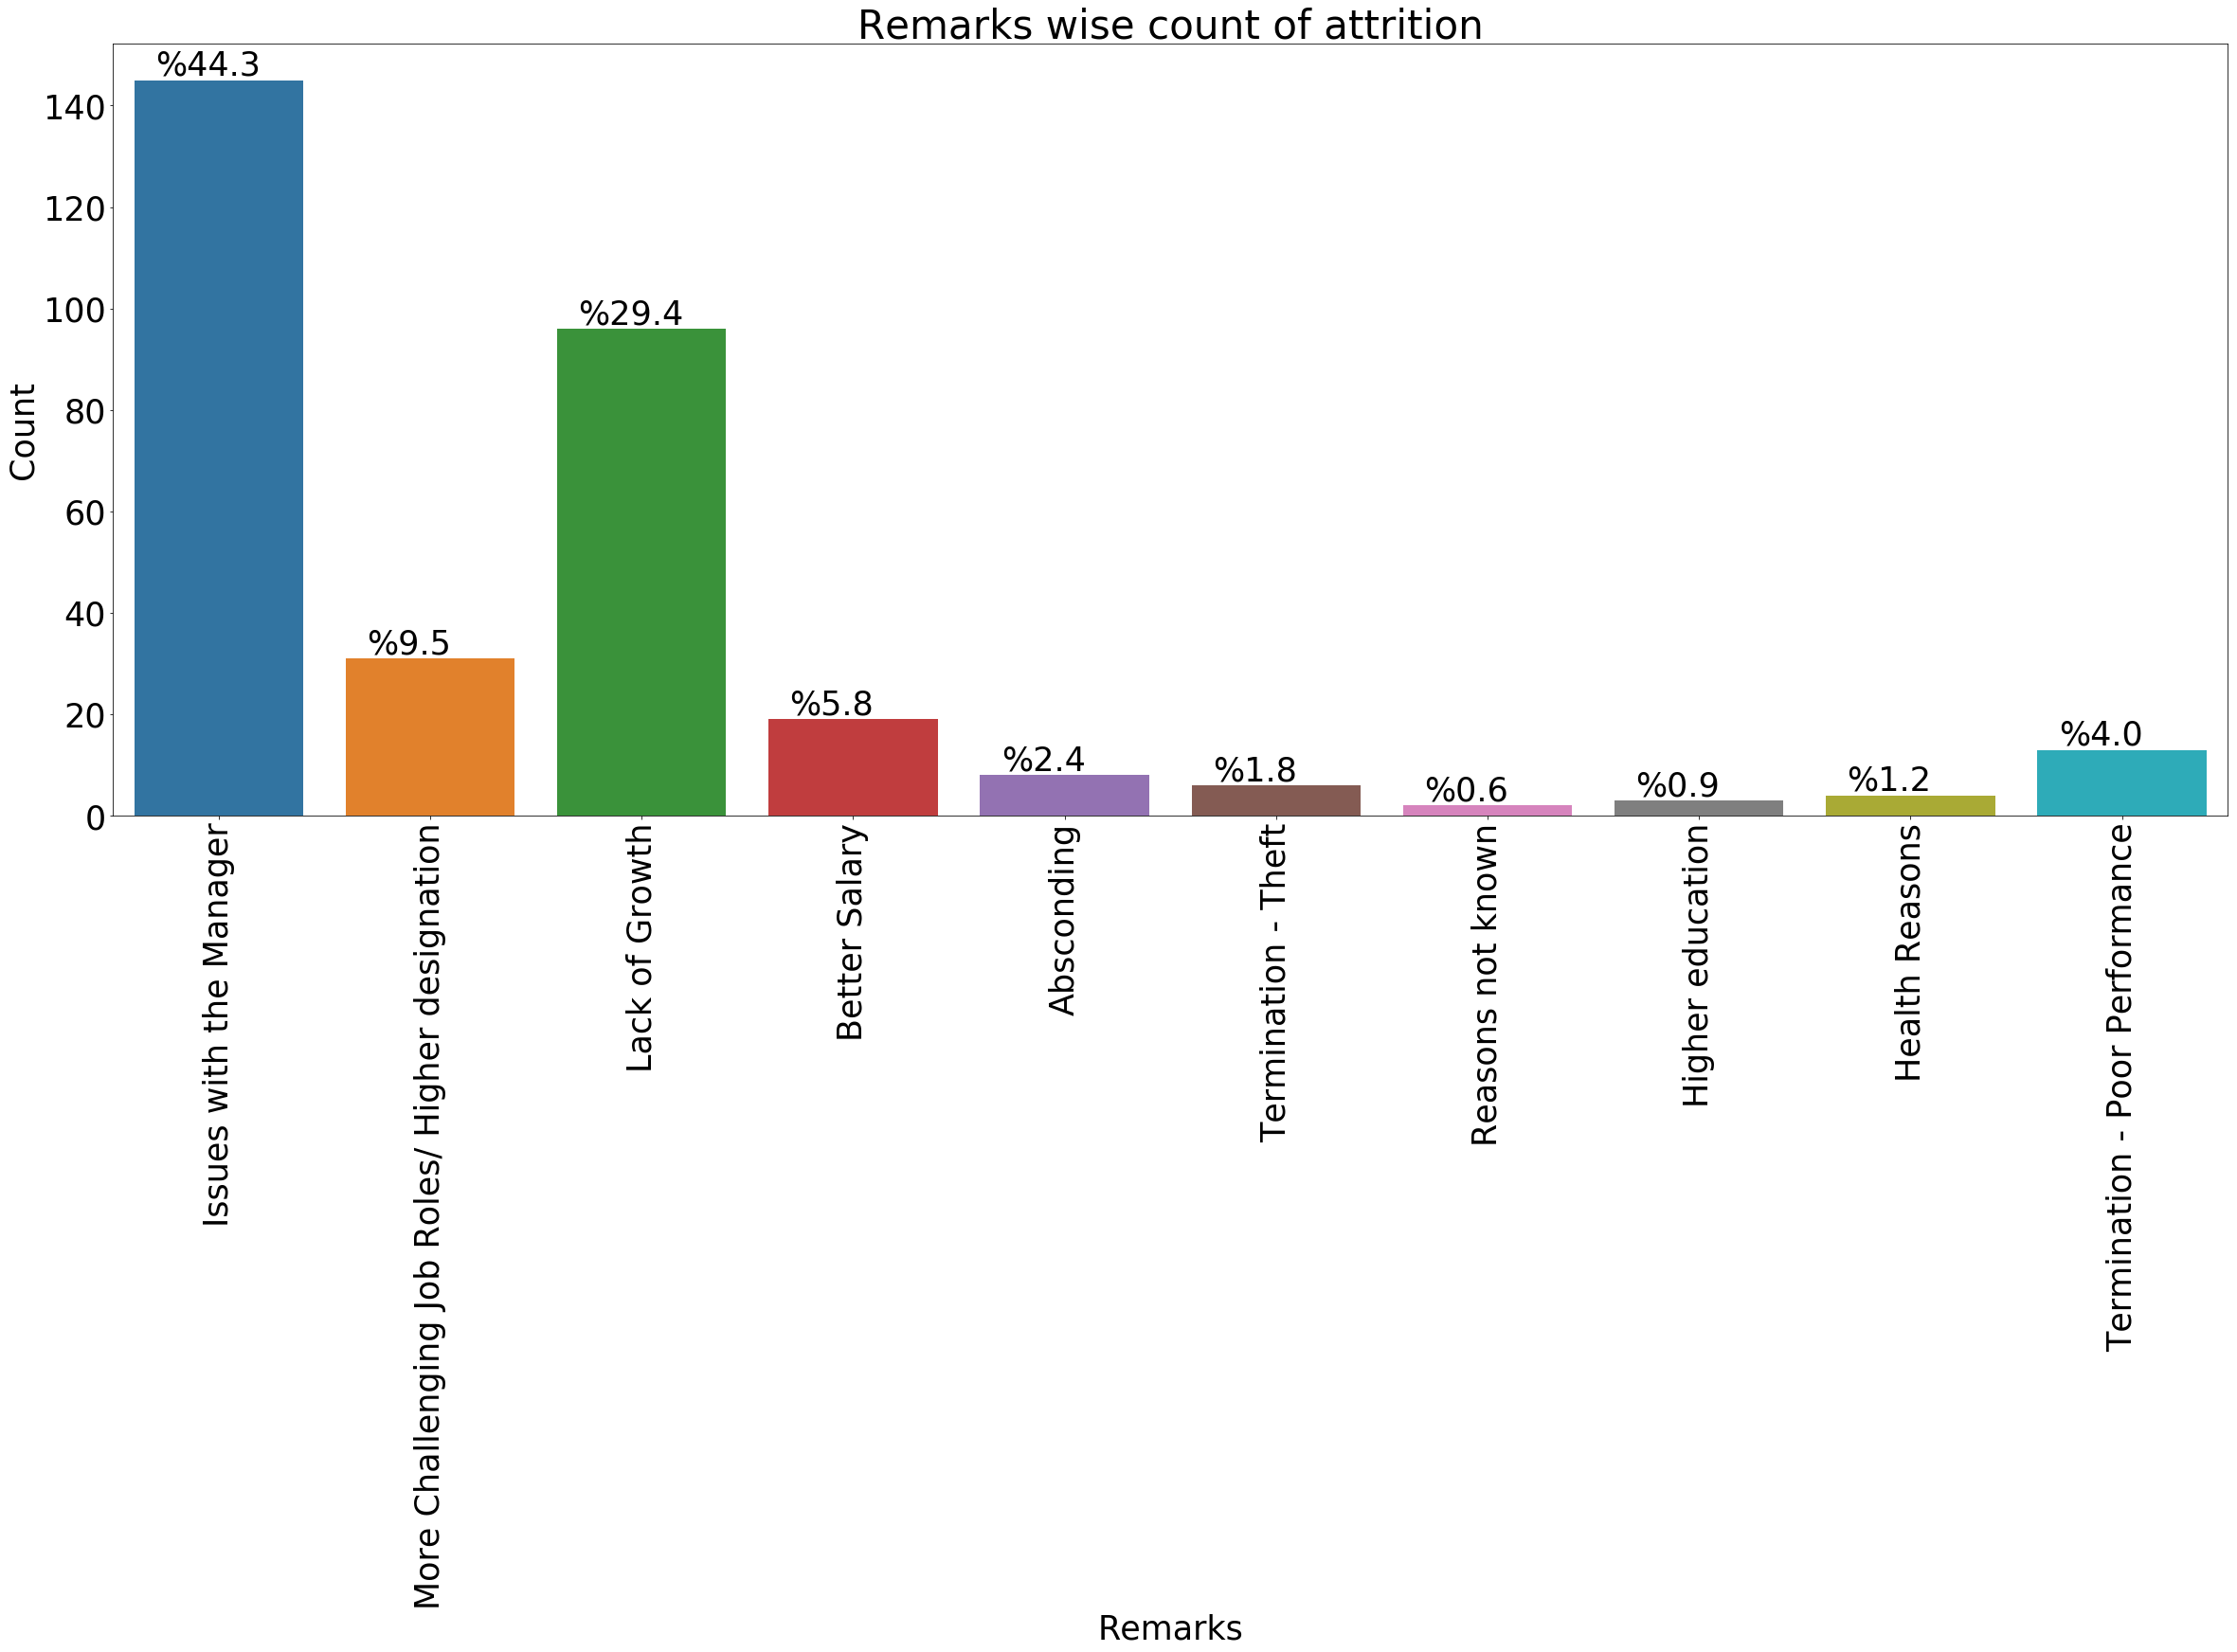

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in l:
    plt.rcParams.update({'font.size': 35})
    plt.figure(figsize=(40,15))
    plt.xticks(rotation=90)
    ax = sns.countplot(x=i, data=df)
    plt.title(i+' wise count of attrition')
    plt.xlabel(i)
    plt.ylabel('Count')
    for p in ax.patches:
        ax.annotate('%{:.1f}'.format(100*(p.get_height()/327)), (p.get_x()+0.1, p.get_height()+1))

**Some initial Insights**

1. Designation and Grade plots are exactly the same, explaining the grades of the designation.

2. Sales executives leave the job most, followed by sr. sales executive : 
    for this the reason can be as follows:
    1. Sales Executives and Sr. Sales executives are at employee grade, they are not at a managerial post. 
    2. Both of these grades are maybe in search of an opportunity providing some manegerial work.
    3. As we go towards more managerial part of the company, attrition amount decreases.
    
3. Gender wise attrition is widely unbalanced, 5.5% Females and 94.5% males leave the job:
    Some reasons for this can be as follows:
    1. Maybe there is a very unbalanced gender ratio among the people working in the company.
    2. Or Females are more prone to work in an organisation without changing it, i.e. they crave for stability of job.

4. Educatin wise attrition is widely unbalanced too, 94.5% B.Tech, 5.5% MBA Graduates
    Some reasons for it can be as follows:
    1. MBA Graduates usually go to the manegerial jobs, i.e. the jobs with higher manegerial grades, and as their attrition is low, thus MBA grads are less prone to attrition.
    2. B tech graduates, are freshers, they seek for growth and opportunity, which they get when the make a switch, thus, they opt for more attrition.

5. Last Rating wise attrition shows that the people who were rated good according to their work, are more prone to attrition.
    Reasons for it can be as follows:
    1. Those who are rated good, are more prone to make a switch as they consider themselves suitable for a better position.
    2. But the ones who are exceptionally rated 5 i.e. best are less prone to attrition, reason can be that they have started liking their job, thus are great at work and having good ratings.
6. Marital Status does not give a good insight of the matter, we have to dig deep into it for better insights
7. Zone wise distribution, gives a good insight of attrition, stating that South Zone constitutes to 30.6% of attrition, followed by North zone, constituting, 22% of total attrition. Thus for finding the reason behind we have to dig deep into it
8. Remarks column indicated that, 'issues with manager' is the reason given by most for attrition, followed by 'lack of growth' which was intuitive as many who left the job, were rated 4/5 thus being capable they would search for better position which was might not have been possible in the past situation when the were employees.

**Now we will go through each feature individually**

> Feature: Grade

In [13]:
df.columns

Index(['S.No', 'EmpID', 'Emp Name', 'DOJ', 'Designation', 'Grade',
       'Attrition ', 'Location', 'In Active Date', 'Tenure', 'Gender',
       'Education', 'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks'],
      dtype='object')

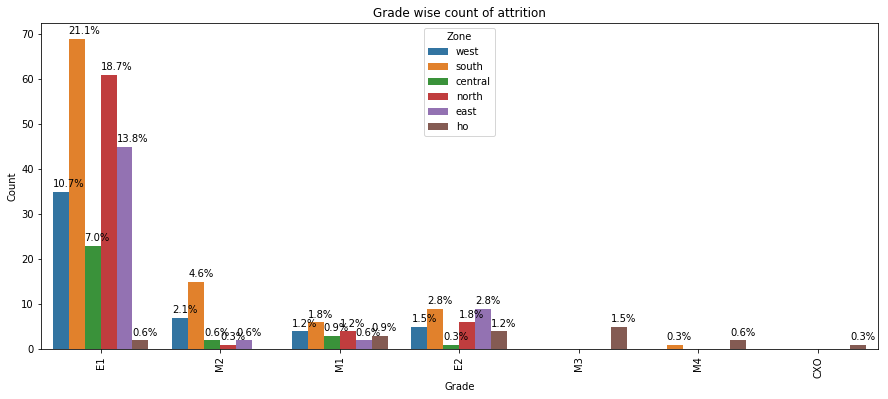

In [14]:
i='Grade'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Zone')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

1. "ho" zone contains more attrition of higher order jobs.
1. "South" zone contains more attrition of lower order jobs.

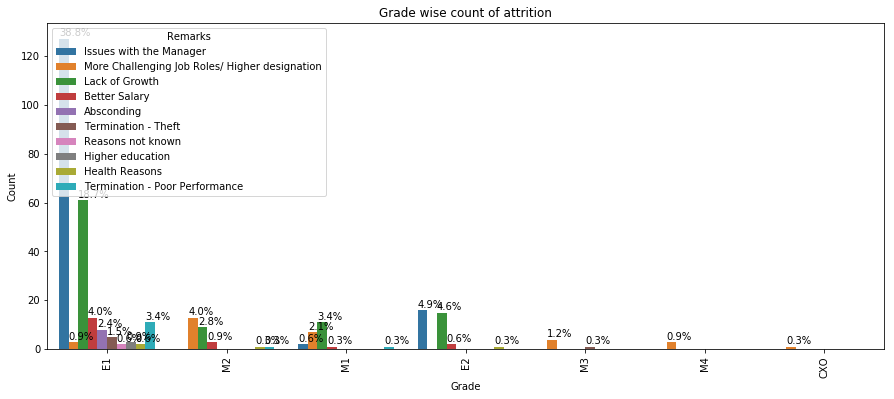

In [15]:
i='Grade'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Remarks')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

1. Termination due to poor performance is mainly in lower graded jobs like e1 and e2.
2. Lack of growth as a reason of attrition decreases as we go towards higher graded jobs.
3. Higher order jobs' employees seek for more challenging job roles/higher designation thus they leave the job.

> Feature: Zone 

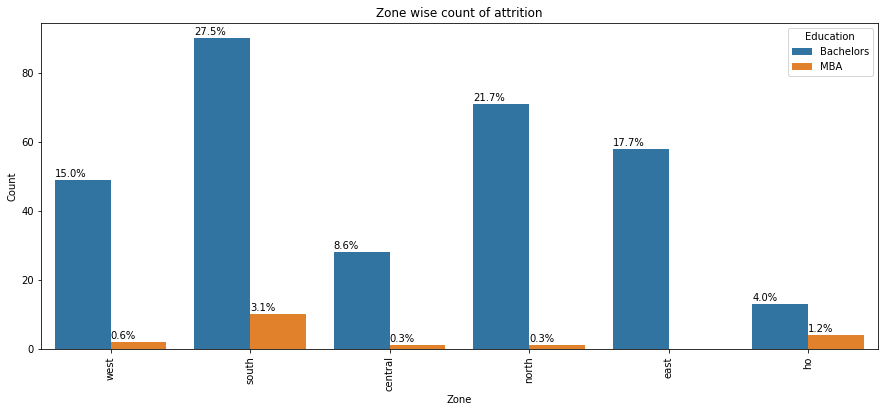

In [16]:
i='Zone'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Education')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

1. From "ho" zone, a MBA graduate is more prone for attrition (not written south because there the total attrition is also high)

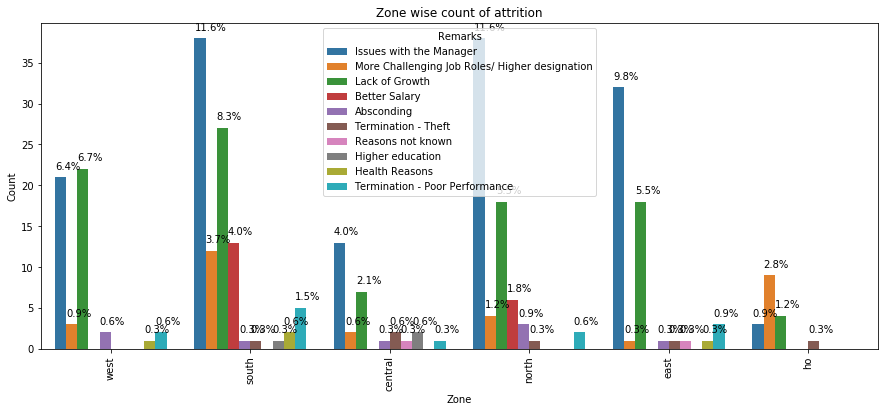

In [17]:
i='Zone'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Remarks')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

1. Theft cases: central zone max
2. Issues with manager: South zone and north zone max, then east
3. Better salary : (majorly in north and south) South max, then north
4. Lack of growth: Highest in south, them west

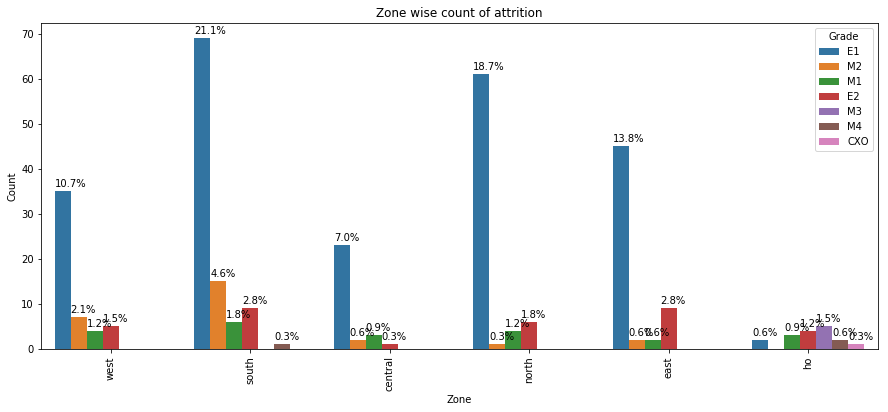

In [18]:
i='Zone'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Grade')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

1. Highest order ranking employee attrition occurs in "ho" zone only.
2. E1 attrition is highest in South Zone.

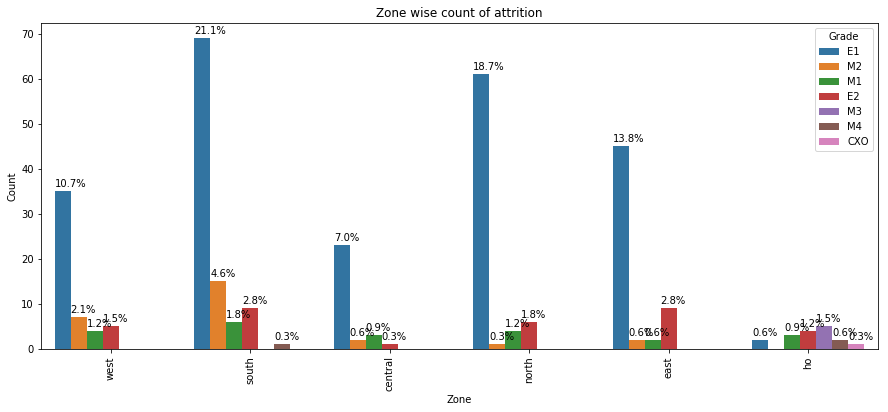

In [19]:
i='Zone'
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=i, data=df,hue='Grade')
plt.title(i+' wise count of attrition')
plt.xlabel(i)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*(p.get_height()/327)), (p.get_x(), p.get_height()+1))

> Feature: Zone 

# Continuous features exploration wrt categorical

Changing the tenure column to total months worked

In [20]:
df['years']=df['Tenure'].str.split('.').map(lambda x: int(x[0]))
df['month1']=df['Tenure'].str.split('.').map(lambda x: int(x[1]))
df['total_months']=df['years']*12+df['month1']

> Tenure

In [21]:
l = ['Gender', 'Zone', 'Grade', 'Marital Status', 'Education']

> Total Months

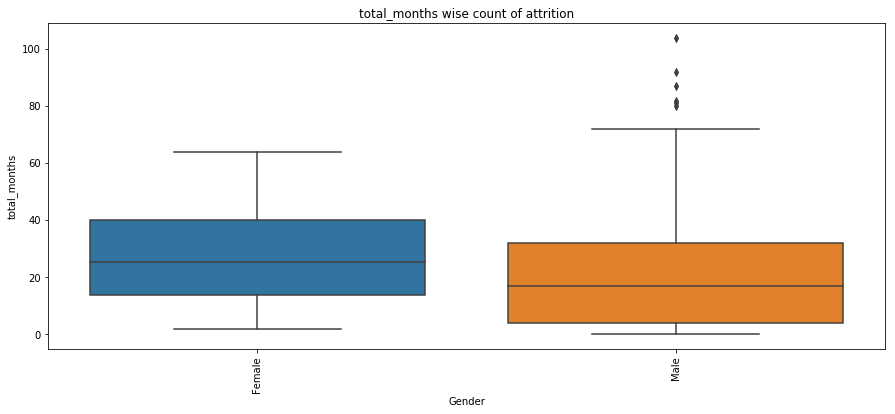

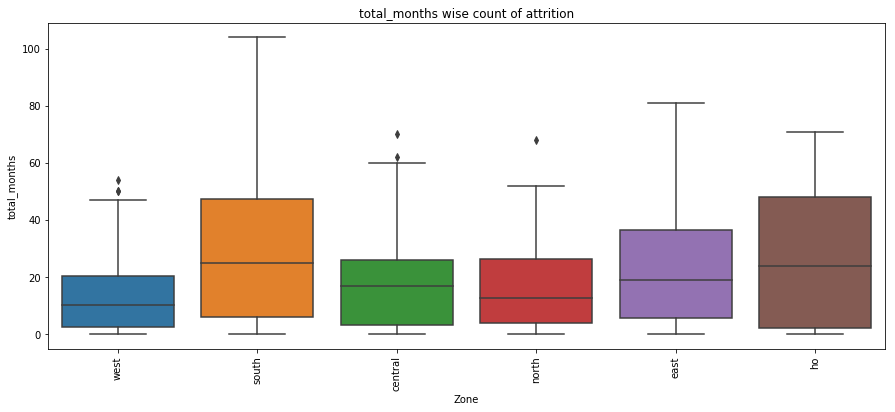

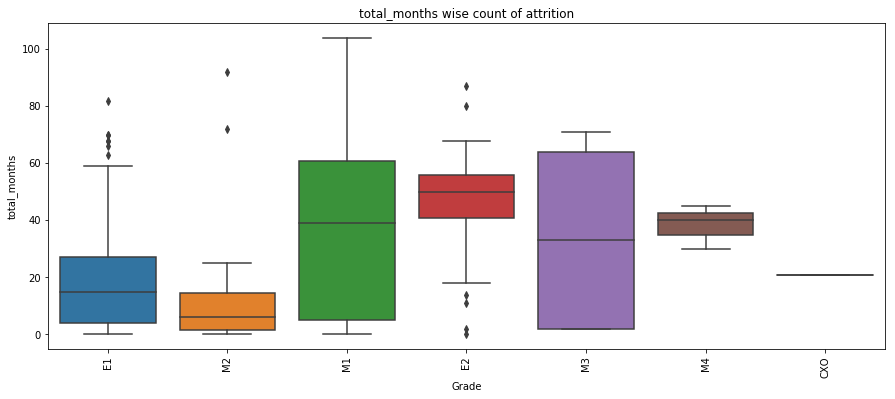

In [22]:
l = ['Gender', 'Zone', 'Grade']
#these were found to be significant
for j in l:
    i='total_months'
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=90)
    ax = sns.boxplot(x=j, y=i,data=df)
    plt.title(i+' wise count of attrition')
    plt.xlabel(j)
    plt.ylabel(i)

1. Employees with M2 and E1 grade are prone to leave the job early.
2. Employees with grade E2 leave the job after a good tenure.
3. M1, M3 and M4 are having comparable tenure.

1. North and west have a comparable and less tenure.
2. South and HO zones have comparatively good tenure with south being better.

1. Females have a better tenure than males.



> Age

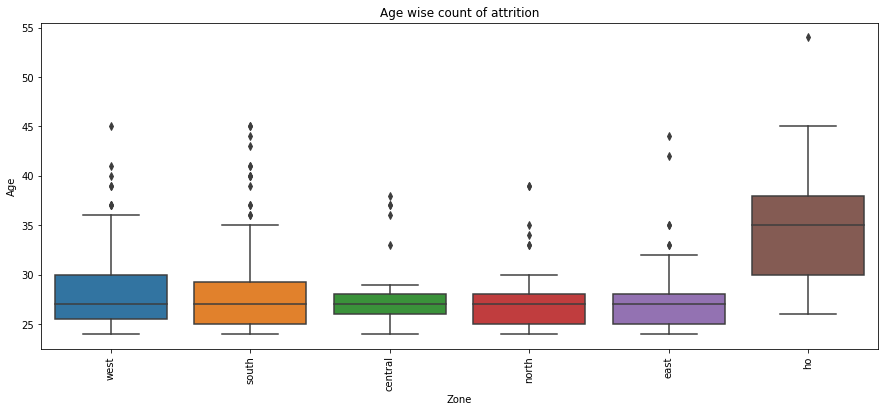

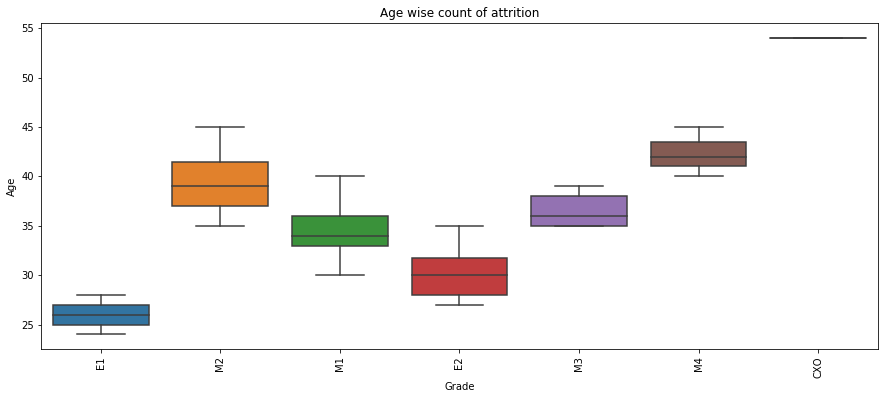

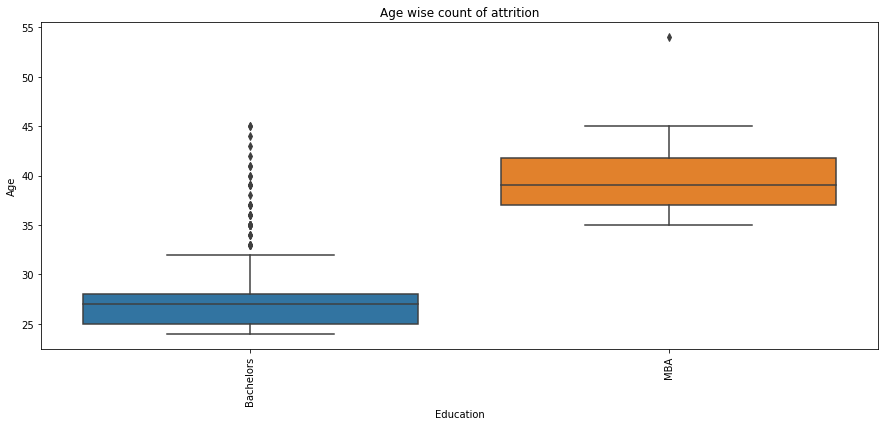

In [23]:
l = ['Zone', 'Grade', 'Education']
#these were found to be significant
for j in l:
    i='Age'
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=90)
    ax = sns.boxplot(x=j, y=i,data=df)
    plt.title(i+' wise count of attrition')
    plt.xlabel(j)
    plt.ylabel(i)

1. All zones except "ho" zone have a range of 25-30 years for attrition, but for "ho" zone, it is high.
2. E1 has the lowest age range for attrition, then comes e2.
3. M3 and M1 have comparable range of ages. M2 has a higher range, then comes M4 and CXO is highest referring to the retirement age.
4. MBA Graduates have leave the job at more age.

In [24]:
df['Engagement Score (% Satisfaction)']=df['Engagement Score (% Satisfaction)'].str.split('%').map(lambda x: int(x[0]))

> Engagement Score (% Satisfaction)

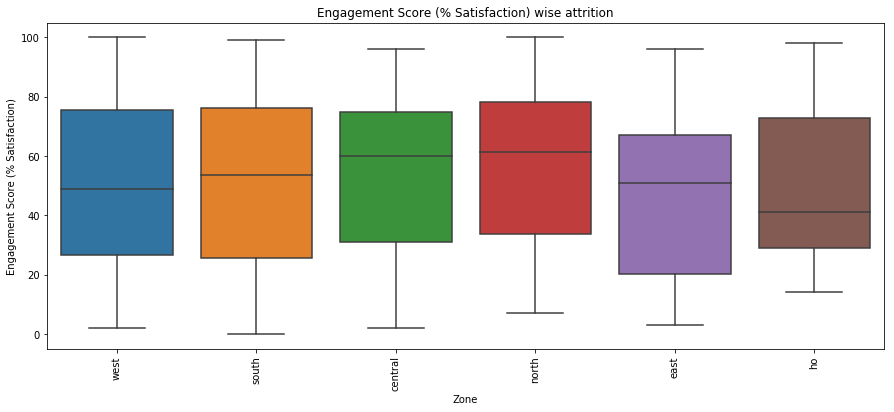

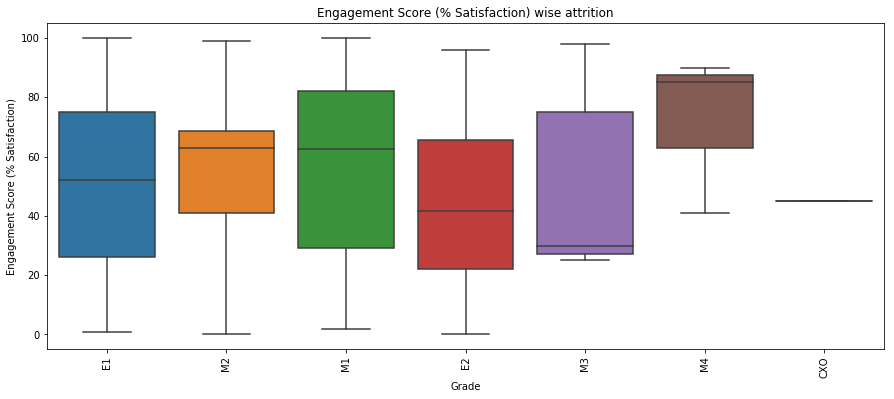

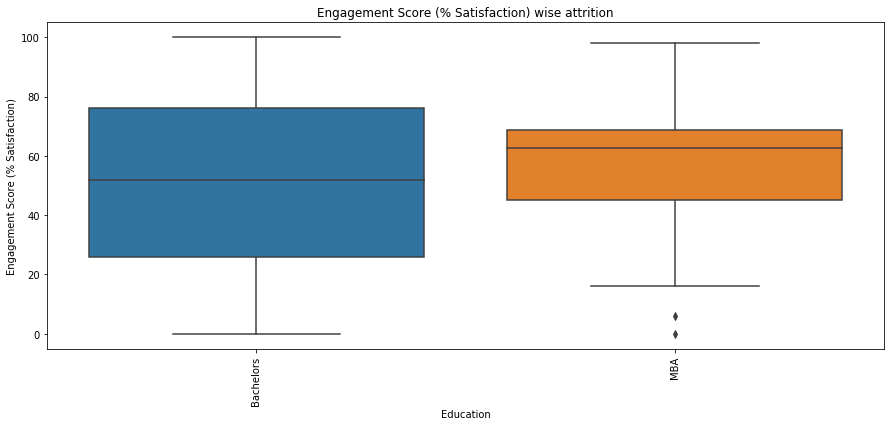

In [25]:
l = ['Zone', 'Grade', 'Education']
#these were found to be significant
for j in l:
    i='Engagement Score (% Satisfaction)'
    plt.rcParams.update({'font.size': 10})
    plt.figure(figsize=(15,6))
    plt.xticks(rotation=90)
    ax = sns.boxplot(x=j, y=i,data=df)
    plt.title(i+' wise attrition')
    plt.xlabel(j)
    plt.ylabel(i)

1. North and central have a comparable and good Job satisfaction rate.
2. "ho" zone have comparably less job satisfaction.
3. East, West and South have comparable and average ob satisfaction rate.  
4. MBA graduates have better job satisfaction rate than B tech ones, but there are some exceptions 
5. M3 has worst job satisfaction rate, followed by E2
6. E1 and CXO have average job satisfaction rate
7. M1 and M2 have comparable and good job satisfaction
8. M4 has best job satisfaction

# Continuous features' relation b/w them 

In [26]:
df3=df[['Age','Engagement Score (% Satisfaction)','total_months','Monthly Income']]

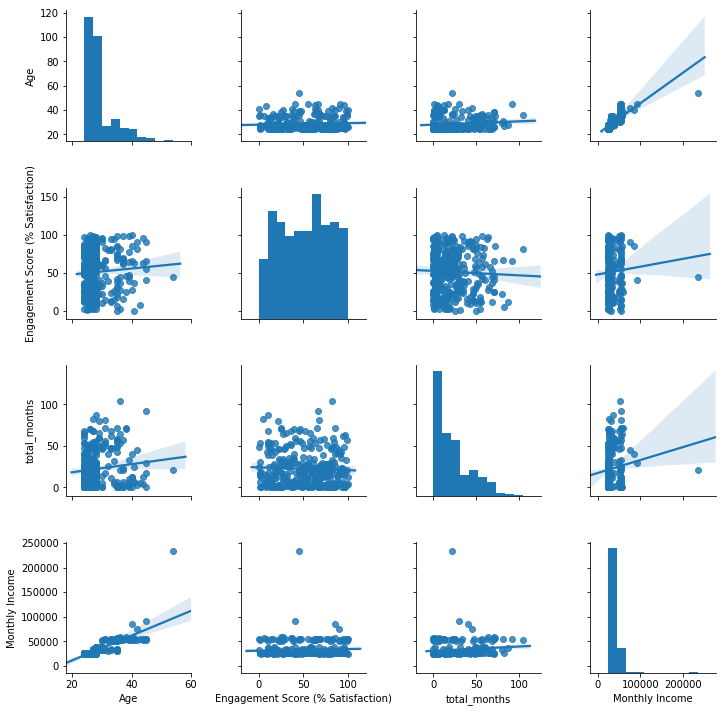

In [27]:
sns.pairplot(df3,kind='reg')

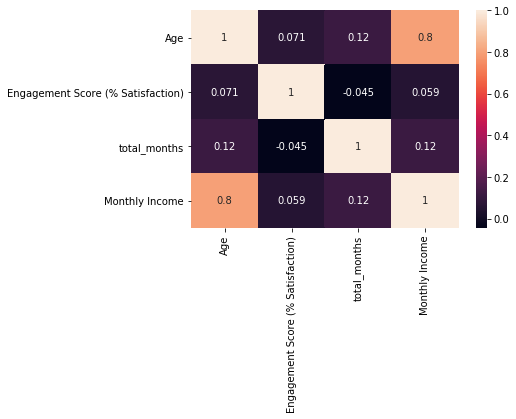

In [28]:
sns.heatmap(df3.corr(),annot=True)

*Thus age and monthly income are correlated to each other with a score of 0.8.*

# Month-wise attritions 

In [29]:
df1 = df
df1['cumul'] = 1
df['cumul'] = 1

In [30]:
df['In Active Date']=pd.to_datetime(df['In Active Date'])
df['DOJ']=pd.to_datetime(df['DOJ'])

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Attritions')

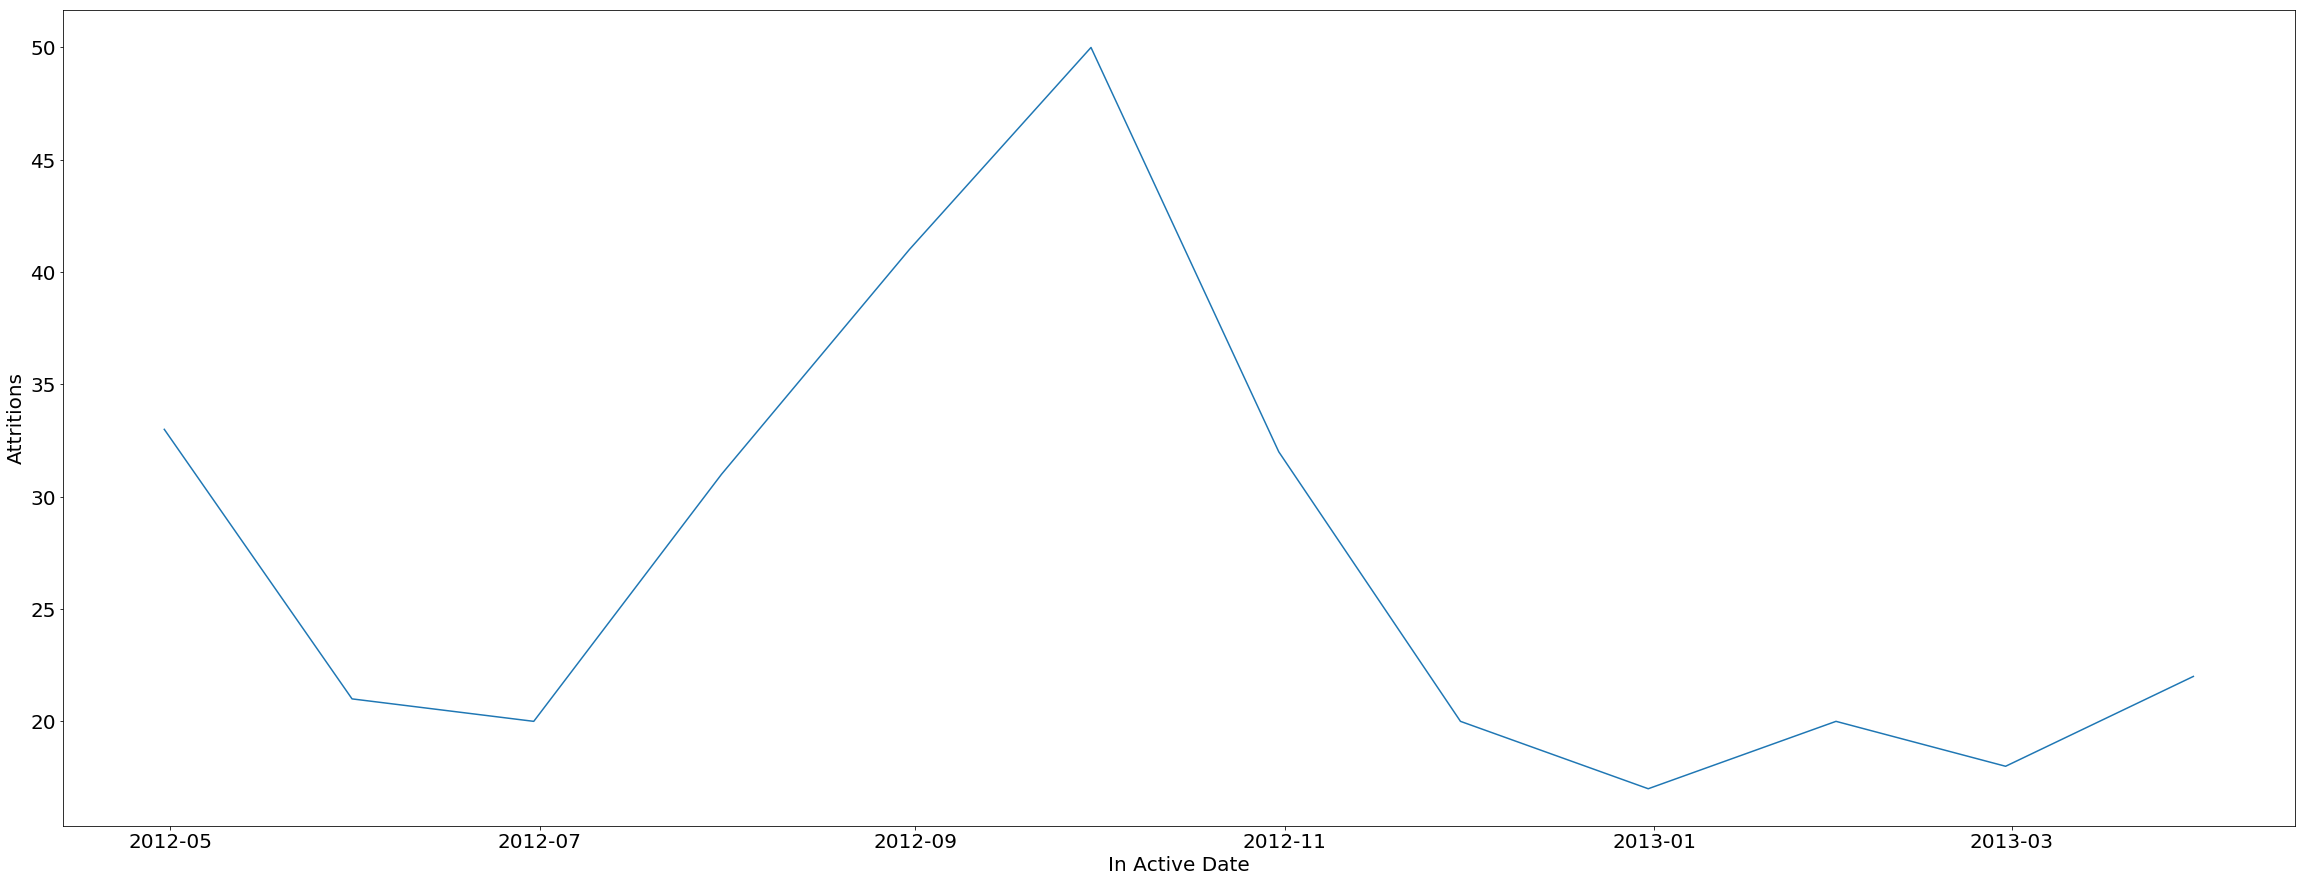

In [31]:
df.index=df['In Active Date']
k = df['cumul']
g = k.groupby(pd.Grouper(freq="M")).sum()
g = pd.DataFrame(g)
g=g[:-1]
plt.figure(figsize=(40,15))
plt.rcParams.update({'font.size': 20})
sns.lineplot(data=g,x=g.index,y='cumul')
plt.ylabel('Attritions')

1. Attritions are highest in October this may be because of the reason that half of the financial year is over so they are eligible for some compensation.
2. Attrition are also high in may, which is just the start of financial year, so if someone is making a switch to another company, he/she will leave in the starting of financial year also.